In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn factor-analyzer

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer

# Load the dataset
try:
    data = pd.read_csv('‪C:/Users/HP/Downloads/Survey (1).csv')
except Exception as e:
    print(f"Error loading data: {e}")

# Inspect the data
print(data.head())
print(data.info())

# Ensure all relevant columns are numeric and handle any missing values
data_numeric = data.select_dtypes(include=[float, int])

# Handle missing values by removing rows with NAs
data_numeric = data_numeric.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA
pca = PCA()
pca_result = pca.fit(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print('Explained variance by each component:', explained_variance)

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print('Cumulative explained variance:', cumulative_variance)

# Plotting the explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(len(cumulative_variance)), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Factor Analysis - Determining the number of factors using the Kaiser criterion
fa = FactorAnalyzer()
fa.fit(data_scaled)
eigenvalues, _ = fa.get_eigenvalues()
print('Eigenvalues:', eigenvalues)

# Perform Factor Analysis with the optimal number of factors (e.g., 3 based on eigenvalues > 1)
n_factors = sum(eigenvalues > 1)  # Or manually set this value
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(data_scaled)

# Factor loadings
loadings = pd.DataFrame(fa.loadings_, index=data_numeric.columns)
print('Factor Loadings:\n', loadings)

# Plotting Factor Loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings')
plt.show()


Error loading data: [Errno 22] Invalid argument: '\u202aC:/Users/HP/Downloads/Survey (1).csv'


NameError: name 'data' is not defined

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer

# File path to the dataset
file_path = '‪C:/Users/HP/Downloads/Survey (1).csv'

# Attempt to load the dataset
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("Error parsing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Proceed only if data is successfully loaded
if 'data' in locals():
    # Inspect the data
    print(data.head())
    print(data.info())

    # Ensure all relevant columns are numeric and handle any missing values
    data_numeric = data.select_dtypes(include=[float, int])

    # Handle missing values by removing rows with NAs
    data_numeric = data_numeric.dropna()

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_numeric)

    # Perform PCA
    pca = PCA()
    pca_result = pca.fit(data_scaled)

    # Explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    print('Explained variance by each component:', explained_variance)

    # Cumulative explained variance
    cumulative_variance = explained_variance.cumsum()
    print('Cumulative explained variance:', cumulative_variance)

    # Plotting the explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, label='Individual explained variance')
    plt.step(range(len(cumulative_variance)), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.legend(loc='best')
    plt.title('Explained Variance by Principal Components')
    plt.show()

    # Factor Analysis - Determining the number of factors using the Kaiser criterion
    fa = FactorAnalyzer()
    fa.fit(data_scaled)
    eigenvalues, _ = fa.get_eigenvalues()
    print('Eigenvalues:', eigenvalues)

    # Perform Factor Analysis with the optimal number of factors (e.g., 3 based on eigenvalues > 1)
    n_factors = sum(eigenvalues > 1)  # Or manually set this value
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
    fa.fit(data_scaled)

    # Factor loadings
    loadings = pd.DataFrame(fa.loadings_, index=data_numeric.columns)
    print('Factor Loadings:\n', loadings)

    # Plotting Factor Loadings
    plt.figure(figsize=(10, 8))
    sns.heatmap(loadings, annot=True, cmap='viridis')
    plt.title('Factor Loadings')
    plt.show()
else:
    print("Data could not be loaded. Please check the file path and data format.")


An unexpected error occurred: [Errno 22] Invalid argument: '\u202aC:/Users/HP/Downloads/Survey (1).csv'
Data could not be loaded. Please check the file path and data format.


Data loaded successfully.
        City Sex    Age      Occupation Monthly Household Income  Income  \
0  Bangalore   M  26-35  Private Sector         85,001 to105,000   95000   
1  Bangalore   M  46-60  Government/PSU         45,001 to 65,000   55000   
2  Bangalore   F  46-60  Government/PSU         25,001 to 45,000   35000   
3  Bangalore   M  36-45  Private Sector                  >125000  200000   
4  Bangalore   M  26-35   Self Employed         85,001 to105,000   95000   

  Planning to Buy a new house Time Frame Reasons for buying a house  \
0                         Yes  6M to 1Yr                   Residing   
1                         Yes  6M to 1Yr                 Investment   
2                         Yes  <6 Months              Rental Income   
3                         Yes  <6 Months                 Investment   
4                         Yes     1-2 Yr                   Residing   

  what type of House  ... 4. Availability of domestic help Time  Size Budgets  \
0        

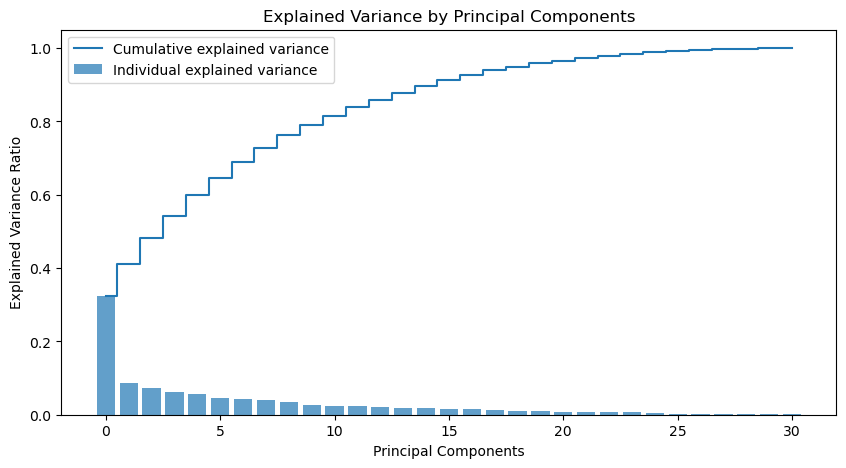

Eigenvalues: [10.02303335  2.69180352  2.21968336  1.8826987   1.74512779  1.42904502
  1.35695975  1.22922436  1.09424572  0.8467563   0.7598664   0.74178882
  0.61242083  0.59430564  0.54190728  0.49514412  0.4572271   0.39097971
  0.29958573  0.2936344   0.22281466  0.20674901  0.19426734  0.19241797
  0.13736338  0.09516072  0.06926348  0.05794238  0.05089534  0.0431124
  0.02457544]
Factor Loadings:
                                                   0         1         2  \
Income                                     0.859596  0.323615  0.180001   
1.Proximity to city                        0.523748 -0.027067  0.135235   
2.Proximity to schools                     0.187492  0.253351  0.068338   
3. Proximity to transport                 -0.076932 -0.007930 -0.046491   
4. Proximity to work place                 0.065015 -0.073737  0.045042   
5. Proximity to shopping                   0.225687  0.607606  0.308764   
1. Gym/Pool/Sports facility                0.283614  0.538462  0.0

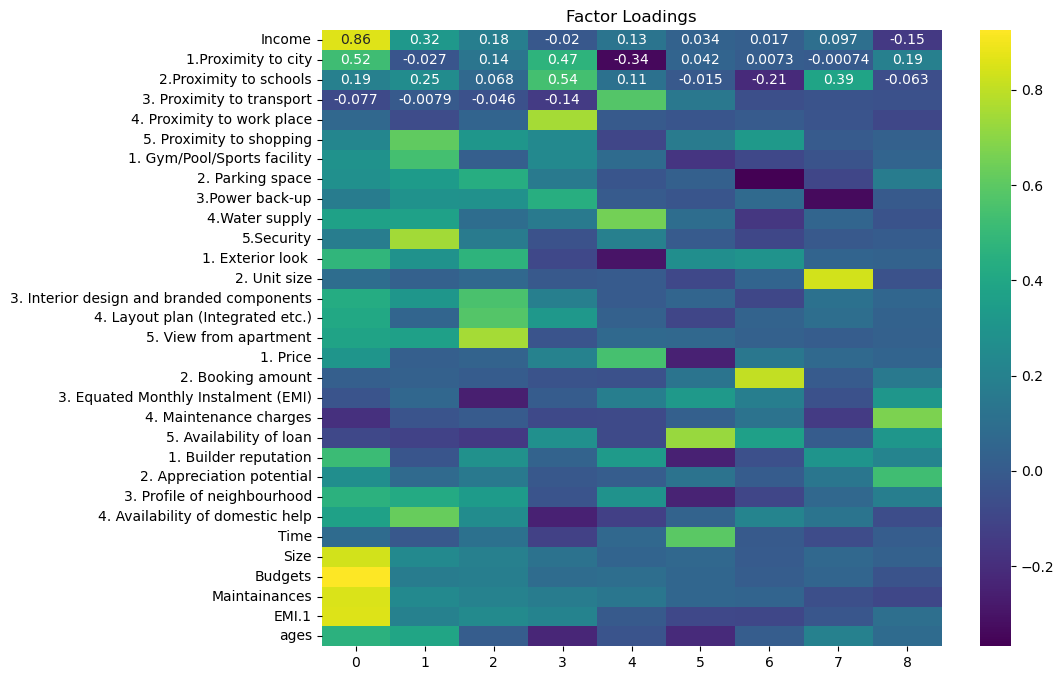

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer

# Correct the file path - Ensure it is correct and accessible
file_path = r'C:/Users/HP/Downloads/Survey (1).csv'

# Attempt to load the dataset
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("Error parsing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Proceed only if data is successfully loaded
if 'data' in locals():
    # Inspect the data
    print(data.head())
    print(data.info())

    # Ensure all relevant columns are numeric and handle any missing values
    data_numeric = data.select_dtypes(include=[float, int])

    # Handle missing values by removing rows with NAs
    data_numeric = data_numeric.dropna()

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_numeric)

    # Perform PCA
    pca = PCA()
    pca_result = pca.fit(data_scaled)

    # Explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    print('Explained variance by each component:', explained_variance)

    # Cumulative explained variance
    cumulative_variance = explained_variance.cumsum()
    print('Cumulative explained variance:', cumulative_variance)

    # Plotting the explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, label='Individual explained variance')
    plt.step(range(len(cumulative_variance)), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.legend(loc='best')
    plt.title('Explained Variance by Principal Components')
    plt.show()

    # Factor Analysis - Determining the number of factors using the Kaiser criterion
    fa = FactorAnalyzer()
    fa.fit(data_scaled)
    eigenvalues, _ = fa.get_eigenvalues()
    print('Eigenvalues:', eigenvalues)

    # Perform Factor Analysis with the optimal number of factors (e.g., 3 based on eigenvalues > 1)
    n_factors = sum(eigenvalues > 1)  # Or manually set this value
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
    fa.fit(data_scaled)

    # Factor loadings
    loadings = pd.DataFrame(fa.loadings_, index=data_numeric.columns)
    print('Factor Loadings:\n', loadings)

    # Plotting Factor Loadings
    plt.figure(figsize=(10, 8))
    sns.heatmap(loadings, annot=True, cmap='viridis')
    plt.title('Factor Loadings')
    plt.show()
else:
    print("Data could not be loaded. Please check the file path and data format.")
